# Problema 33, 34, 35 y 36
## 33)
Resolveremos EDOs de la forma <br>
<center> $\frac{dy}{dx} = y' = f(x,y(x))$ </center> <br>
En este problema, queremos resolver numéricamente <br>
<center> $y'= -y$ </center> <br>
<center> $x \in [0,2.6]$ ; $y(x=0)=1$ </center> <br>
Con un paso $h = 0.2$ <br>
Analíticamente sabemos que la solución es <br>
<center> $y(x)= e^{-x}$ </center> <br>
Pongamos en práctica los integradores numéricos:

- Euler Explícito ("Forward")
- Euler Implícito ("Backward")
- Euler Centrado
- Euler Modificado
- Euler Mejorado
- Runge-Kutta *(R-K)* de 2º orden
- Runge-Kutta de 4º orden

In [1]:
#Definimos funciones a usar

import matplotlib.pyplot as plt
import numpy as np

def pts(a,b,y0,n,h):
    if h == 0 and n != 0:      #Si sé la cant de pasos, pongo "h = 0" para buscarlo
        h = (b-a)/n
    else:                      #Si sé el step, busco la cantidad de pasos
        n = (b-a)/h
        n = int(n+1) #Para que sea un entero y sirva para index. el "+1" es para que agarre como extremo final x = b
        
    x = np.array([a + i*h for i in range(n)]) #para guardar los pts
    y = np.empty(n)
    
    y[0] = y0 #cond inic
    
    return x,y,n,h

def f(x,y):
    f = -y
    return f

def forward(x,y,f,n,h): #n = cant de steps ; h = long del step ; x = dom ; y = lo que busco (imag) ; f = y' (lo que sé)
                        #"Forward" o "Explícito": y_i+1 = y_i + h*f(x_i,y_i)
        
    for i in range(n-1): #Porque uso un "i+1"
        y[i+1] = y[i] + h*f(x[i],y[i])
        
    return y

def backward(x,y,f,n,h): #"Backward" o "Implícito": y_i+1 = y_i + h*f(x_i+1,y_i+1)
                         #Luego, como es un método implícito, ha yque despejar a mano (y no depender de f)
                         #¿Cómo? y' ~ (y_i+1 - y_i)/h = f(x_i+1,y_i+1) = -y_i+1 (Igualamos a f_i+1 por Euler Implic)
                         #Entonces queda y_i+1 = y_i * (1/(h+1))
    
    for i in range(n-1): #Porque uso un "i+1"
        y[i+1] = y[i]*(1/(h+1)) #De lo calculado a mano...
    
    return y

def center(x,y,f,n,h): #"Centrado" o "Cranck-Nicolson": y_i+1 = y_i + h*(f_i + f_i+1)/2 => Sigue teniendo un término implícito...
                       #Repetimos el procedimiento anterior (reemplazar y despejar a mano) y obtenemos:
                       #y_i+1 = y_i * ((2-h)/(2+h))
            
    for i in range(n-1): #Porque uso un "i+1"
        y[i+1] = y[i]*((2-h)/(2+h)) #De lo calculado a mano...
    
    return y

def mod(x,y,f,n,h): #"Modificado": y_i+1 = y_i + h*f(x_i + h/2, ÿ_i) ; donde ÿ_i = y_i + h*f(x_i,y_i)/2
    
    for i in range(n-1): #Porque uso un "i+1"
        
        y_i = y[i] + 0.5*h*f(x[i],y[i]) #Defino mi "ÿ_i"
        y[i+1] = y[i] + h*f(x[i] + h/2, y_i) #Aplico el método
    
    return y

def mej(x,y,f,n,h): #"Mejorado" o "R-K de 2º orden": y_i+1 = y_i + h/2*(f(x_i,y_i) + f(x_i+1,ÿ_i+1)) ; donde ÿ_i+1 = y_i + h*f(x_i,y_i)
    
    for i in range(n-1): #Porque uso un "i+1"
        
        y_i = y[i] + h*f(x[i],y[i]) #Defino mi "ÿ_i+1"
        y[i+1] = y[i] + 0.5*h*(f(x[i], y[i])+f(x[i+1],y_i)) #Aplico el método
    
    return y

def RK(x,y,f,n,h): #R-K de 4º orden: y_i+1 = y_i + h/6 * (k1 + 2*k2 + 2*k3 + k4), c/u los definiremos directamente.
                   #Para further info, revisar la Butcher Tableau correspondiente...
        
    for i in range(n-1): #Porque uso un "i+1"
        
        k1 = f(x[i],y[i])
        k2 = f(x[i]+h*0.5,y[i]+0.5*h*k1)
        k3 = f(x[i]+h*0.5,y[i]+0.5*h*k2)
        k4 = f(x[i]+h,y[i]+h*k3)
        
        y[i+1] = y[i] + (h/6)*(k1+2*k2+2*k3+k4) #Aplico el método
    
    return y

In [2]:
x,y,n,h = pts(0,2.6,y0=1,n=0,h=0.2)
y_fwd = forward(x,y,f,n,h)

x,y,n,h = pts(0,2.6,y0=1,n=0,h=0.2)
y_bwd = backward(x,y,f,n,h)

x,y,n,h = pts(0,2.6,y0=1,n=0,h=0.2)
y_center = center(x,y,f,n,h)

#Hasta acá vemos cómo pudimos recrear la fig 2.2 del Numerical Methods in Astrophysics

x,y,n,h = pts(0,2.6,y0=1,n=0,h=0.2)
y_mod = mod(x,y,f,n,h)

x,y,n,h = pts(0,2.6,y0=1,n=0,h=0.2)
y_mej = mej(x,y,f,n,h)

x,y,n,h = pts(0,2.6,y0=1,n=0,h=0.2)
y_RK = RK(x,y,f,n,h)

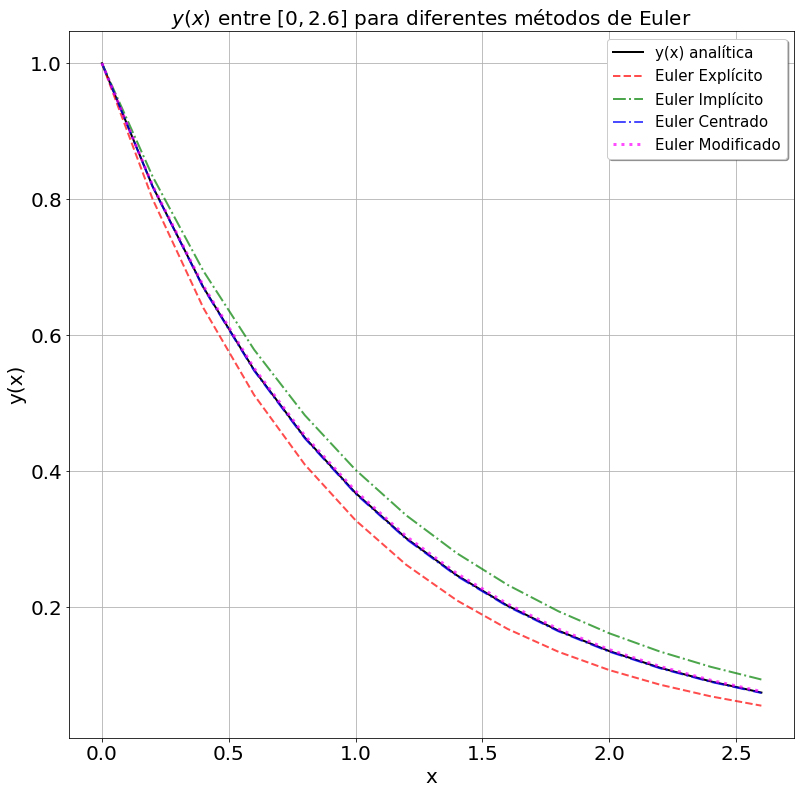

In [3]:
#Graficamos

t = np.linspace(0,2.6,n)
w = np.exp(-t)

plt.figure(figsize=(13,13))
plt.plot(t,w,color='k',lw=2,alpha=1,label='y(x) analítica')
plt.plot(x,y_fwd,color='r',lw=2,ls='--',alpha=0.7,label='Euler Explícito')
plt.plot(x,y_bwd,color='g',lw=2,ls='-.',alpha=0.7,label='Euler Implícito')
plt.plot(x,y_center,color='b',lw=2,ls='-.',alpha=0.7,label='Euler Centrado')
plt.plot(x,y_mod,color='magenta',lw=3,ls=':',alpha=0.7,label='Euler Modificado')
plt.grid(True)
plt.xlabel('x',size=20)
plt.ylabel('y(x)',size=20)
plt.title('$y(x)$ entre $[0,2.6]$ para diferentes métodos de Euler',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=15,shadow=True);

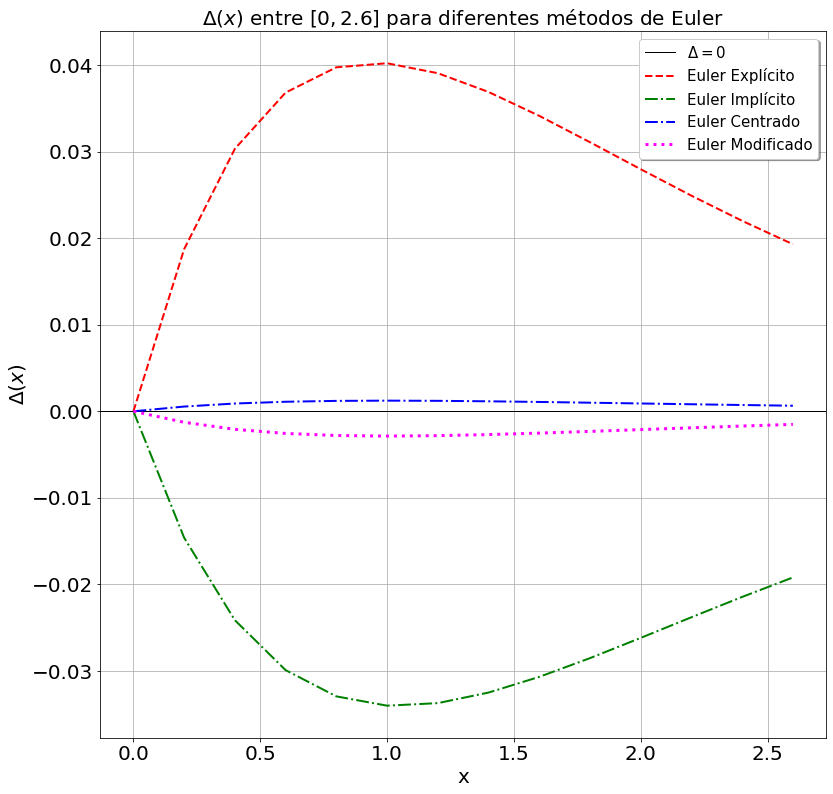

In [4]:
#Veamos el error, definido como E = y(x) - y_num(x):

plt.figure(figsize=(13,13))
plt.axhline(0,lw=1,color='k',label='$\Delta = 0$')
plt.plot(x,np.exp(-x)-y_fwd,color='r',lw=2,ls='--',label='Euler Explícito')
plt.plot(x,np.exp(-x)-y_bwd,color='g',lw=2,ls='-.',label='Euler Implícito')
plt.plot(x,np.exp(-x)-y_center,color='b',lw=2,ls='-.',label='Euler Centrado')
plt.plot(x,np.exp(-x)-y_mod,color='magenta',lw=3,ls=':',label='Euler Modificado')
plt.grid(True)
plt.xlabel('x',size=20)
plt.ylabel('$\Delta (x)$',size=20)
plt.title('$\Delta (x)$ entre $[0,2.6]$ para diferentes métodos de Euler',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=15,shadow=True);

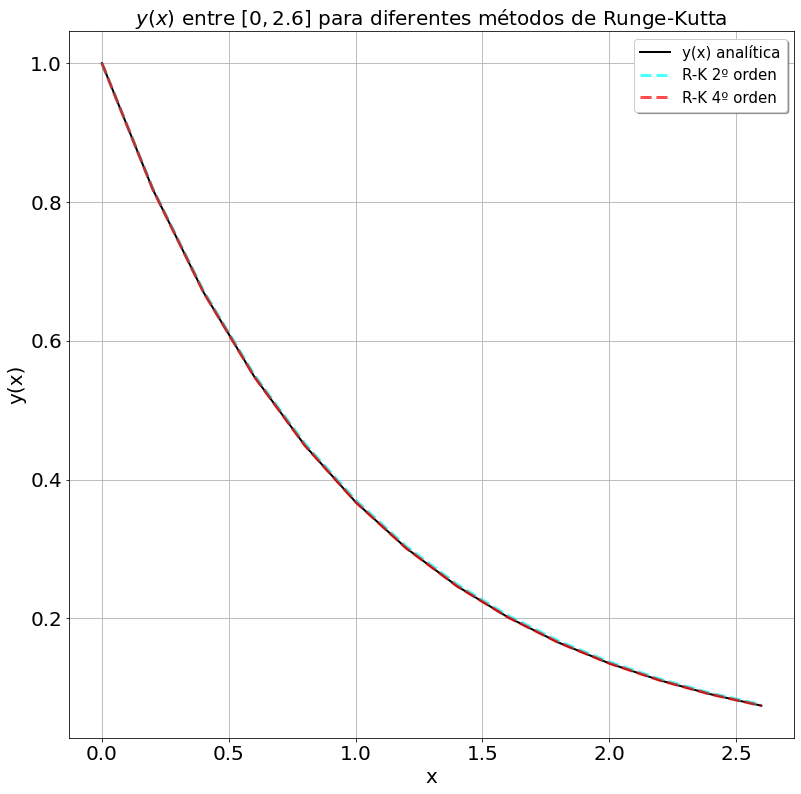

In [6]:
plt.figure(figsize=(13,13))
plt.plot(t,w,color='k',lw=2,alpha=1,label='y(x) analítica')
plt.plot(x,y_mej,color='cyan',lw=3,ls='--',alpha=0.7,label='R-K 2º orden')
plt.plot(x,y_RK,color='r',lw=3,ls='--',alpha=0.7,label='R-K 4º orden')
plt.grid(True)
plt.xlabel('x',size=20)
plt.ylabel('y(x)',size=20)
plt.title('$y(x)$ entre $[0,2.6]$ para diferentes métodos de Runge-Kutta',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=15,shadow=True);

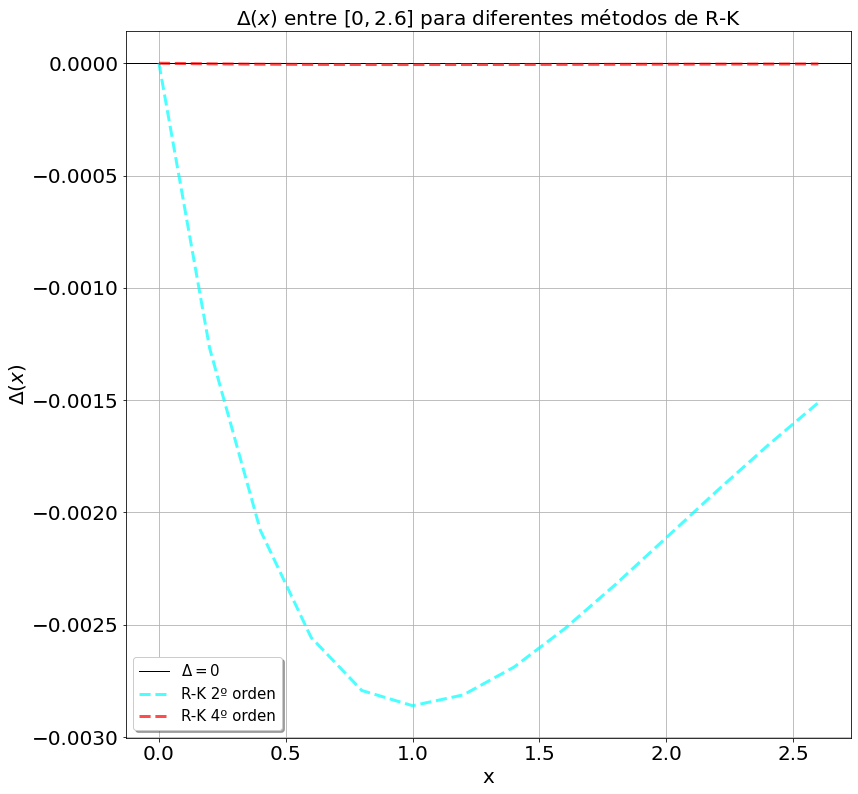

In [7]:
plt.figure(figsize=(13,13))
plt.axhline(0,lw=1,color='k',label='$\Delta = 0$')
plt.plot(x,np.exp(-x)-y_mej,color='cyan',lw=3,ls='--',alpha=0.7,label='R-K 2º orden')
plt.plot(x,np.exp(-x)-y_RK,color='r',lw=3,ls='--',alpha=0.7,label='R-K 4º orden')
plt.grid(True)
plt.xlabel('x',size=20)
plt.ylabel('$\Delta (x)$',size=20)
plt.title('$\Delta (x)$ entre $[0,2.6]$ para diferentes métodos de R-K',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=15,shadow=True);

## 34)
En este caso tenemos <br>
<center> $y'= y - x(x-2)$ </center> <br>
<center> $x \in [0,10]$ ; $y(x=0)=0$ </center> <br>
Con un paso $h \in (0.1,0.5,1)$ <br>
Analíticamente sabemos que la solución es <br>
<center> $y(x)= x^2$ </center> <br>

In [8]:
#Entonces, sólo tenemos que definir una nueva f

def f(x,y):
    f = y - x*(x-2)
    return f

#Aunque debo re-definir el método "backwards" y "centrado", porque ahora me cambió la func...

def backward(x,y,f,n,h): #"Backward" o "Implícito": y_i+1 = y_i + h*f(x_i+1,y_i+1)
                         #Luego, como es un método implícito, ha yque despejar a mano (y no depender de f)
                         #¿Cómo? y' ~ (y_i+1 - y_i)/h = f(x_i+1,y_i+1) = y_i+1 - x_i+1(x_i+1 -2) (Igualamos a f_i+1 por Euler Implic)
                         #Entonces queda (lo escribimos directamente)
    
    for i in range(n-1): #Porque uso un "i+1"
        y[i+1] = (h/(1-h)) * ((y[i]/h) - x[i+1]*(x[i+1]-2)) #De lo calculado a mano...
    
    return y

def center(x,y,f,n,h): #"Centrado" o "Cranck-Nicolson": y_i+1 = y_i + h*(f_i + f_i+1)/2 => Sigue teniendo un término implícito...
                       #Repetimos el procedimiento anterior (reemplazar y despejar a mano) y obtenemos:
            
    for i in range(n-1): #Porque uso un "i+1"
        y[i+1] = (2*h/(2-h))*(0.5*(y[i]-x[i]*(x[i]-2)-x[i+1]*(x[i+1]-2)) + y[i]/h)
    
    return y

#Queda un "1-h" en el denominador, así que h =/= 1 para estos métodos.

### $h = 1$

In [19]:
#Copiamos y pegamos, reemplazando:

x,y,n,h = pts(0,10,y0=0,n=0,h=1)
y_fwd = forward(x,y,f,n,h)

#Backward y center no func para h = 1

x,y,n,h = pts(0,10,y0=0,n=0,h=1)
y_mod = mod(x,y,f,n,h)

x,y,n,h = pts(0,10,y0=0,n=0,h=1)
y_mej = mej(x,y,f,n,h)

x,y,n,h = pts(0,10,y0=0,n=0,h=1)
y_RK = RK(x,y,f,n,h)

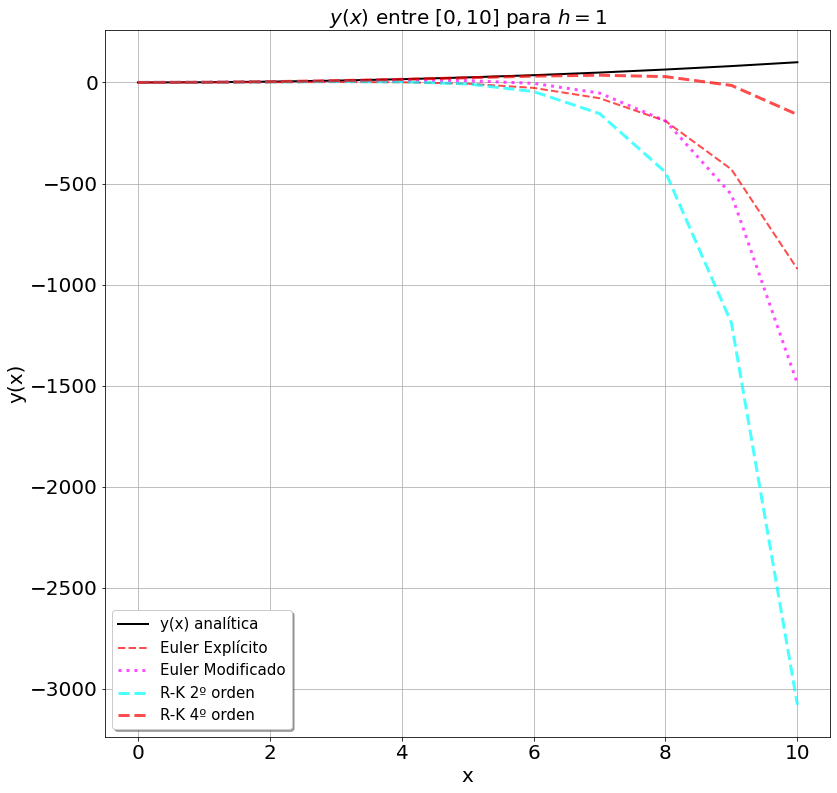

In [20]:
#Graficamos

t = np.linspace(0,10,n)
w = t**2

plt.figure(figsize=(13,13))
plt.plot(t,w,color='k',lw=2,alpha=1,label='y(x) analítica')
plt.plot(x,y_fwd,color='r',lw=2,ls='--',alpha=0.7,label='Euler Explícito')
plt.plot(x,y_mod,color='magenta',lw=3,ls=':',alpha=0.7,label='Euler Modificado')
plt.plot(x,y_mej,color='cyan',lw=3,ls='--',alpha=0.7,label='R-K 2º orden')
plt.plot(x,y_RK,color='r',lw=3,ls='--',alpha=0.7,label='R-K 4º orden')
plt.grid(True)
plt.xlabel('x',size=20)
plt.ylabel('y(x)',size=20)
plt.title('$y(x)$ entre $[0,10]$ para $h=1$',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=15,shadow=True);

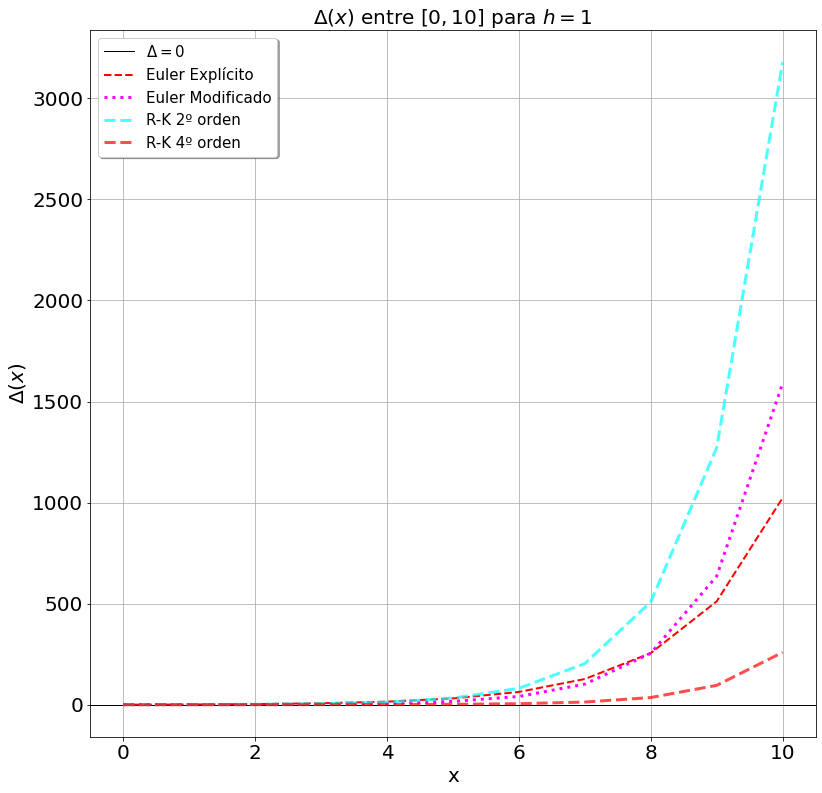

In [21]:
#Veamos el error, definido como E = y(x) - y_num(x):

plt.figure(figsize=(13,13))
plt.axhline(0,lw=1,color='k',label='$\Delta = 0$')
plt.plot(x,w-y_fwd,color='r',lw=2,ls='--',label='Euler Explícito')
plt.plot(x,w-y_mod,color='magenta',lw=3,ls=':',label='Euler Modificado')
plt.plot(x,w-y_mej,color='cyan',lw=3,ls='--',alpha=0.7,label='R-K 2º orden')
plt.plot(x,w-y_RK,color='r',lw=3,ls='--',alpha=0.7,label='R-K 4º orden')
plt.grid(True)
plt.xlabel('x',size=20)
plt.ylabel('$\Delta (x)$',size=20)
plt.title('$\Delta (x)$ entre $[0,10]$ para $h=1$',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=15,shadow=True);

### $h = 0.5$

In [22]:
x,y,n,h = pts(0,10,y0=0,n=0,h=0.5)
y_fwd = forward(x,y,f,n,h)

x,y,n,h = pts(0,10,y0=0,n=0,h=0.5)
y_bwd = backward(x,y,f,n,h)

x,y,n,h = pts(0,10,y0=0,n=0,h=0.5)
y_center = center(x,y,f,n,h)

x,y,n,h = pts(0,10,y0=0,n=0,h=0.5)
y_mod = mod(x,y,f,n,h)

x,y,n,h = pts(0,10,y0=0,n=0,h=0.5)
y_mej = mej(x,y,f,n,h)

x,y,n,h = pts(0,10,y0=0,n=0,h=0.5)
y_RK = RK(x,y,f,n,h)

##### *NO MOSTRAMOS "EULER IMPLÍCITO" PORQUE ES MUY MALA LA INTEGRACIÓN PARA $x > 5$*

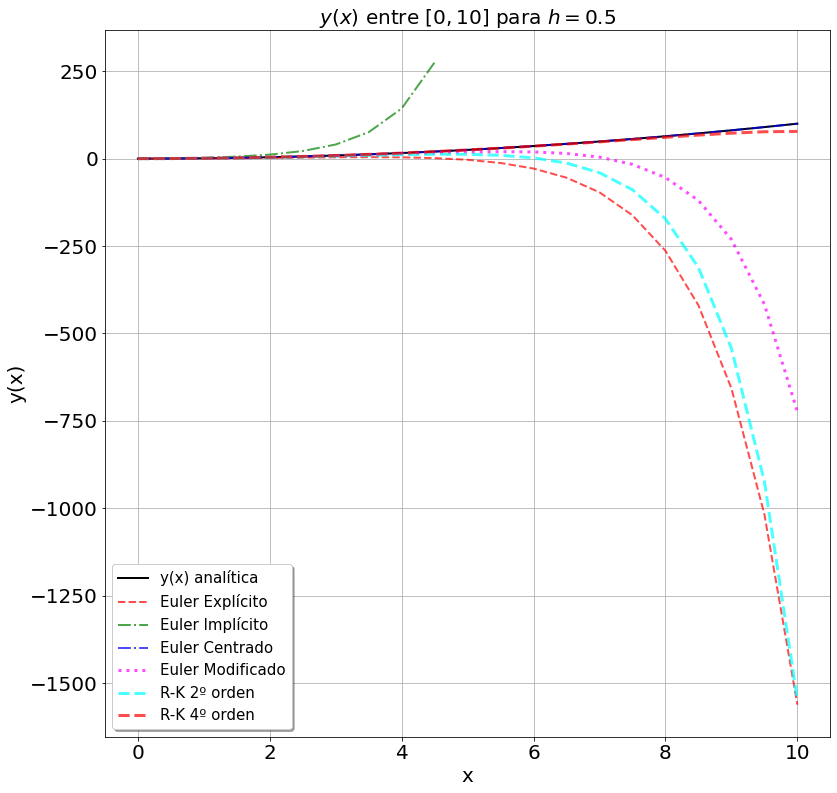

In [23]:
#Graficamos

t = np.linspace(0,10,n)
w = t**2

plt.figure(figsize=(13,13))
plt.plot(t,w,color='k',lw=2,alpha=1,label='y(x) analítica')
plt.plot(x,y_fwd,color='r',lw=2,ls='--',alpha=0.7,label='Euler Explícito')
plt.plot(x[:10],y_bwd[:10],color='g',lw=2,ls='-.',alpha=0.7,label='Euler Implícito')
plt.plot(x,y_center,color='b',lw=2,ls='-.',alpha=0.7,label='Euler Centrado')
plt.plot(x,y_mod,color='magenta',lw=3,ls=':',alpha=0.7,label='Euler Modificado')
plt.plot(x,y_mej,color='cyan',lw=3,ls='--',alpha=0.7,label='R-K 2º orden')
plt.plot(x,y_RK,color='r',lw=3,ls='--',alpha=0.7,label='R-K 4º orden')
plt.grid(True)
plt.xlabel('x',size=20)
plt.ylabel('y(x)',size=20)
plt.title('$y(x)$ entre $[0,10]$ para $h=0.5$',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=15,shadow=True);

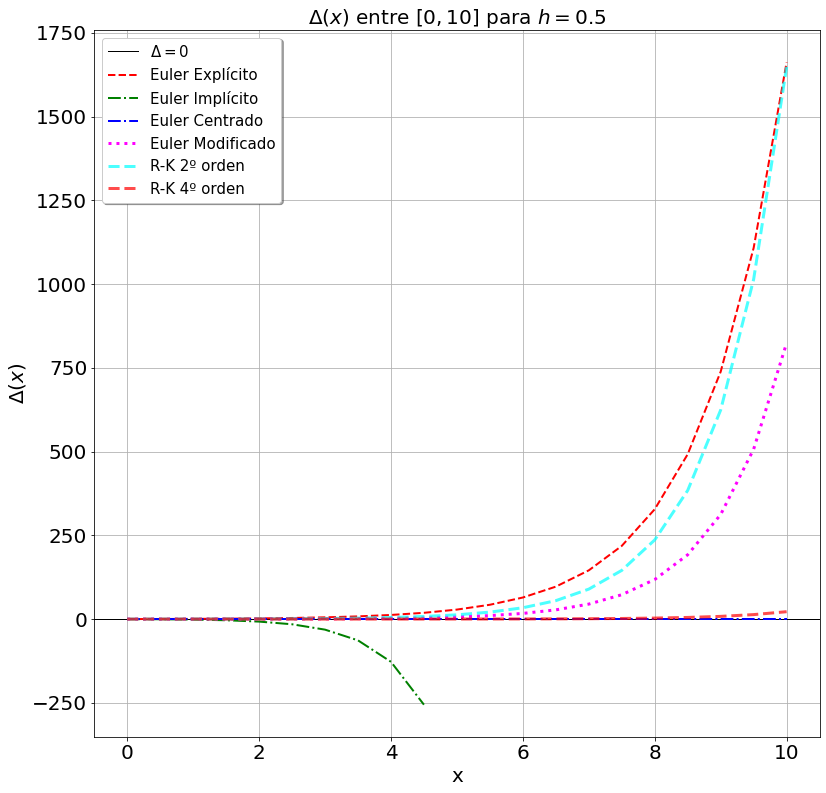

In [24]:
#Veamos el error, definido como E = y(x) - y_num(x):

plt.figure(figsize=(13,13))
plt.axhline(0,lw=1,color='k',label='$\Delta = 0$')
plt.plot(x,w-y_fwd,color='r',lw=2,ls='--',label='Euler Explícito')
plt.plot(x[:10],w[:10]-y_bwd[:10],color='g',lw=2,ls='-.',label='Euler Implícito')
plt.plot(x,w-y_center,color='b',lw=2,ls='-.',label='Euler Centrado')
plt.plot(x,w-y_mod,color='magenta',lw=3,ls=':',label='Euler Modificado')
plt.plot(x,w-y_mej,color='cyan',lw=3,ls='--',alpha=0.7,label='R-K 2º orden')
plt.plot(x,w-y_RK,color='r',lw=3,ls='--',alpha=0.7,label='R-K 4º orden')
plt.grid(True)
plt.xlabel('x',size=20)
plt.ylabel('$\Delta (x)$',size=20)
plt.title('$\Delta (x)$ entre $[0,10]$ para $h=0.5$',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=15,shadow=True);

### $h = 0.1$

In [25]:
x,y,n,h = pts(0,10,y0=0,n=0,h=0.1)
y_fwd = forward(x,y,f,n,h)

x,y,n,h = pts(0,10,y0=0,n=0,h=0.1)
y_bwd = backward(x,y,f,n,h)

x,y,n,h = pts(0,10,y0=0,n=0,h=0.1)
y_center = center(x,y,f,n,h)

x,y,n,h = pts(0,10,y0=0,n=0,h=0.1)
y_mod = mod(x,y,f,n,h)

x,y,n,h = pts(0,10,y0=0,n=0,h=0.1)
y_mej = mej(x,y,f,n,h)

x,y,n,h = pts(0,10,y0=0,n=0,h=0.1)
y_RK = RK(x,y,f,n,h)

##### *LO MISMO PARA EL IMPLÍCITO, SÓLO QUE AHORA CORTAMOS EN $x > 7$ Y TAMBIÉN CORTAMOS AL EXPLÍCITO*

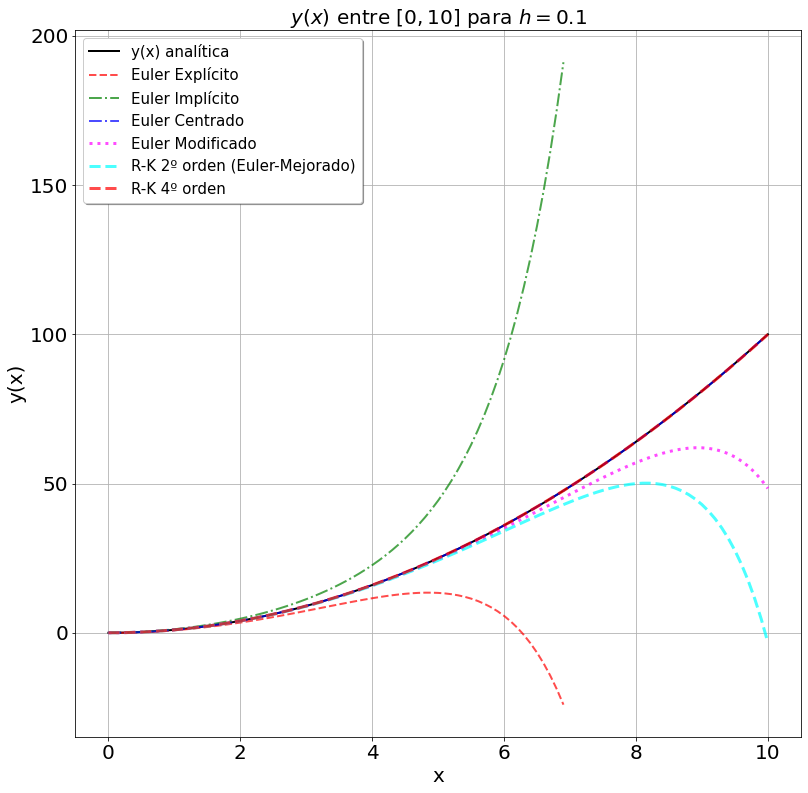

In [28]:
#Graficamos

t = np.linspace(0,10,n)
w = t**2

plt.figure(figsize=(13,13))
plt.plot(t,w,color='k',lw=2,alpha=1,label='y(x) analítica')
plt.plot(x[:70],y_fwd[:70],color='r',lw=2,ls='--',alpha=0.7,label='Euler Explícito')
plt.plot(x[:70],y_bwd[:70],color='g',lw=2,ls='-.',alpha=0.7,label='Euler Implícito')
plt.plot(x,y_center,color='b',lw=2,ls='-.',alpha=0.7,label='Euler Centrado')
plt.plot(x,y_mod,color='magenta',lw=3,ls=':',alpha=0.7,label='Euler Modificado')
plt.plot(x,y_mej,color='cyan',lw=3,ls='--',alpha=0.7,label='R-K 2º orden (Euler-Mejorado)')
plt.plot(x,y_RK,color='r',lw=3,ls='--',alpha=0.7,label='R-K 4º orden')
plt.grid(True)
plt.xlabel('x',size=20)
plt.ylabel('y(x)',size=20)
plt.title('$y(x)$ entre $[0,10]$ para $h=0.1$',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=15,shadow=True);

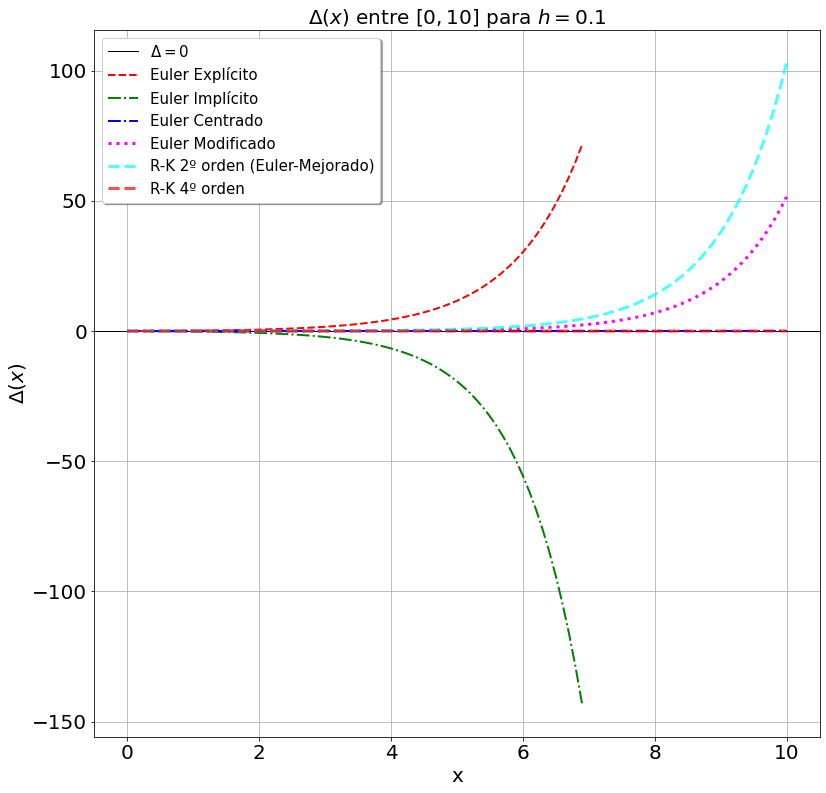

In [29]:
#Veamos el error, definido como E = y(x) - y_num(x):

plt.figure(figsize=(13,13))
plt.axhline(0,lw=1,color='k',label='$\Delta = 0$')
plt.plot(x[:70],w[:70]-y_fwd[:70],color='r',lw=2,ls='--',label='Euler Explícito')
plt.plot(x[:70],w[:70]-y_bwd[:70],color='g',lw=2,ls='-.',label='Euler Implícito')
plt.plot(x,w-y_center,color='b',lw=2,ls='-.',label='Euler Centrado')
plt.plot(x,w-y_mod,color='magenta',lw=3,ls=':',label='Euler Modificado')
plt.plot(x,w-y_mej,color='cyan',lw=3,ls='--',alpha=0.7,label='R-K 2º orden (Euler-Mejorado)')
plt.plot(x,w-y_RK,color='r',lw=3,ls='--',alpha=0.7,label='R-K 4º orden')
plt.grid(True)
plt.xlabel('x',size=20)
plt.ylabel('$\Delta (x)$',size=20)
plt.title('$\Delta (x)$ entre $[0,10]$ para $h=0.1$',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=15,shadow=True);

## 35)
Ahora veamos EDOs de 2º orden (ojo el cambio de notación) <br>
<center> $\frac{d^2x}{dt^2} = x'' = f(t,x(t),x'(t))$ </center> <br>
Y podimos escribir <br>
<center> $x'(t) = v(t)$ </center> <br>
En este problema, queremos resolver numéricamente <br>
<center> $x''= -x$ </center> <br>
<center> $t \in [0,2 \pi]$ ; $x(t=0)=1$ y $x'(t=0)=0$ </center> <br>
Con $n = 100$ <br>
Analíticamente sabemos que la solución es <br>
<center> $x(t)= cos(t)$ </center> <br>
<center> $x'(t)= v(t) = -sin(t)$ </center> <br>

Veamos cómo aplicamos el método *LeapFrog:*

In [30]:
#Debemos re-definir algunas funciones, para tener en cuenta esta x'(t) = v(t)

#Cambiemos la notación, para que en vez de hablar de "y(x)" hablemos de "x(t)"...
#Todo 1-D...

def pts(a,b,x0,v0,n,h): #Copio la func para def el dom, pero para 2º orden
    
    if h == 0 and n != 0:      #Si sé la cant de pasos, pongo "h = 0" para buscarlo
        h = (b-a)/n
    else:                      #Si sé el step, busco la cantidad de pasos
        n = (b-a)/h
        n = int(n+1) #Para que sea un entero y sirva para index. el "+1" es para que agarre como extremo final x = b
        
    t = np.array([a + i*h for i in range(n)]) #para guardar los pts
    x = np.empty(n)
    v = np.empty(n) #Llamo x' = v
    
    x[0] = x0 #cond inic x(t0)
    v[0] = v0 #x'(t0) = v(t0)
    
    return t,x,v,n,h

def f(x): #Se come sólo 1 arg: x(t)
    f = -x
    return f #x'' = f(t,x(t),x'(t)=v(t)) ; En este caso, x'' = -x = f

def LF(t,x,v,f,n,h):
    for i in range(n-1):
        vk = v[i] + f(x[i])*h*0.5
        
        x[i+1] = x[i] + vk*h
        v[i+1] = vk + f(x[i+1])*h*0.5
        
    return x,v

In [31]:
#Como antes...

t,x,v,n,h = pts(0,2*np.pi,1,0,n=100,h=0)
x,v = LF(t,x,v,f,n,h)

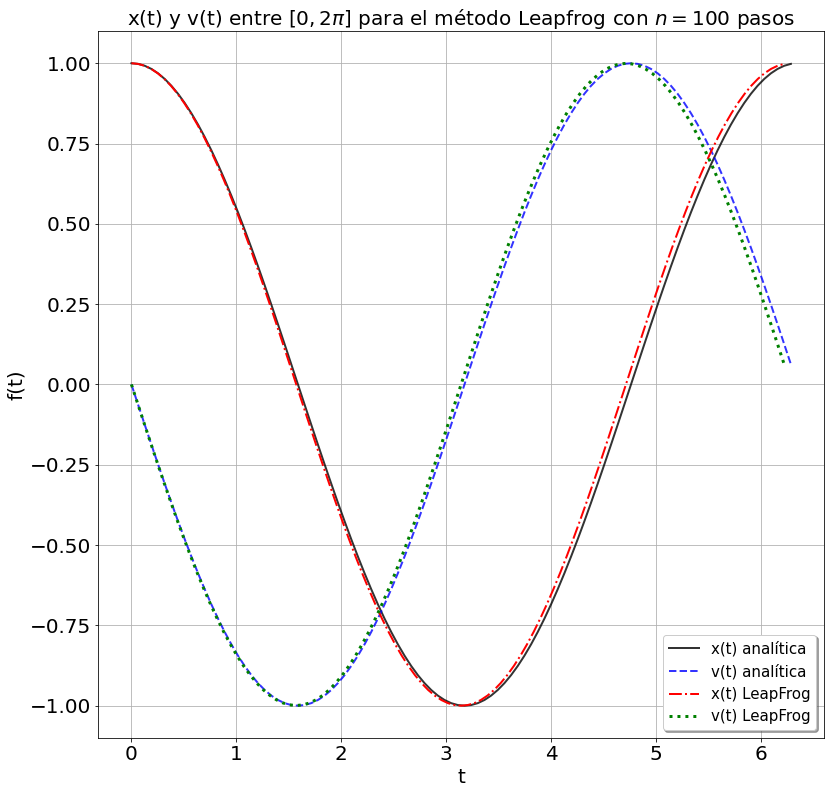

In [32]:
#Graficamos

s = np.linspace(0,2*np.pi,n)
w = np.cos(t) #x(t) analítica
r = -np.sin(t) #v(t) analítica

plt.figure(figsize=(13,13))
plt.plot(s,w,color='k',lw=2,alpha=0.8,label='x(t) analítica')
plt.plot(s,r,color='b',lw=2,ls='--',alpha=0.8,label='v(t) analítica')
plt.plot(t,x,color='r',lw=2,ls='-.',label='x(t) LeapFrog')
plt.plot(t,v,color='g',lw=3,ls=':',label='v(t) LeapFrog')
plt.grid(True)
plt.xlabel('t',size=20)
plt.ylabel('f(t)',size=20)
plt.title('x(t) y v(t) entre $[0,2 \pi ]$ para el método Leapfrog con $n = 100$ pasos',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=15,shadow=True);

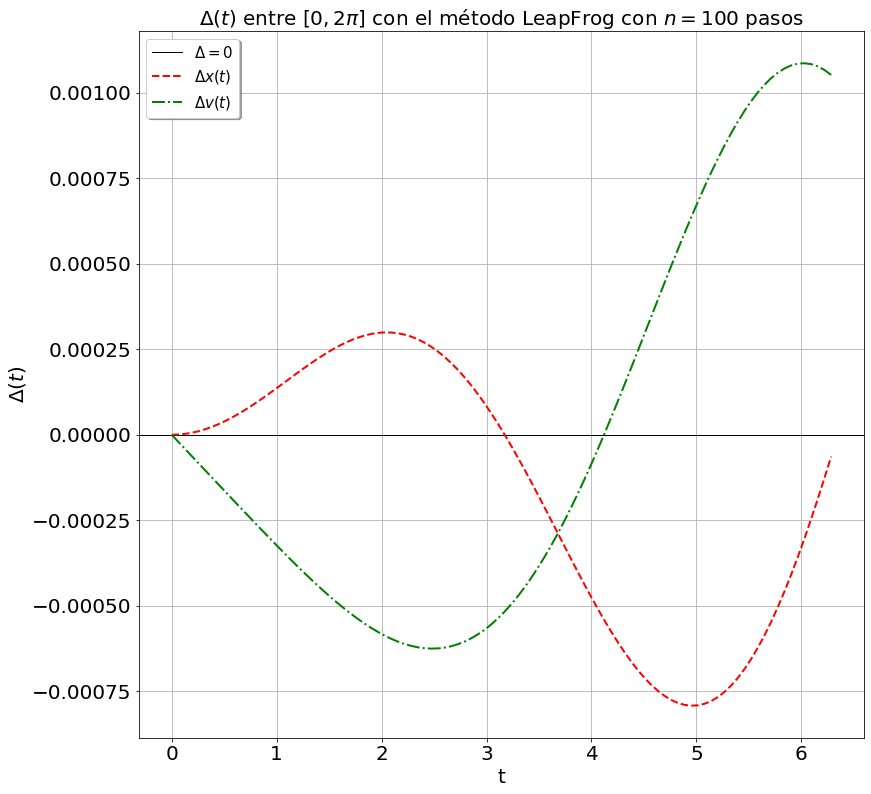

In [33]:
#Veamos el error, definido como E(x) = y(x) - y_num(x):

plt.figure(figsize=(13,13))
plt.axhline(0,lw=1,color='k',label='$\Delta = 0$')
plt.plot(s,w-x,color='r',lw=2,ls='--',label='$\Delta x(t)$')
plt.plot(s,r-v,color='g',lw=2,ls='-.',label='$\Delta v(t)$')
plt.grid(True)
plt.xlabel('t',size=20)
plt.ylabel('$\Delta (t)$',size=20)
plt.title('$\Delta (t)$ entre $[0,2 \pi ]$ con el método LeapFrog con $n = 100$ pasos',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=15,shadow=True);

## 36)

Ahora queremos resolver numéricamente <br>
<center> $x''= -\frac{g}{l} sin(x)$ </center> <br>
<center> $t \in [0,10]$ segs ; $x(t=0)=30$º $= \theta_0$ y $x'(t=0)=0$ º/s </center> <br>
Con $h = 0.01$ segs <br>
Analíticamente sabemos que la solución es <br>
<center> $x(t)= \theta_0 cos(\omega t)$ </center> <br>
<center> $x'(t)= v(t) = -\omega \theta_0 sin(\omega t)$ </center> <br>
con $\omega = \sqrt{\frac{g}{l}}$ <br>
De nuevo, como $f(t,x,x') = f(x)$, tenemos vía libre para usar LeapFrog:

In [34]:
#Defino las ctes:
g = 9.80665 #m/s^2
l = 1 #m

#Y como np.sin o np.cos se comen RADIANES, hago la transf:
def DegToRad(d):
    r = d*np.pi/180
    return r

def RadToDeg(r):
    d = 180*r/np.pi
    return d

#Defino mi nuevo f:
def f(x): #Se come sólo 1 arg: x(t)
    f = (-g/l)*np.sin(x)
    return f #x'' = f(t,x(t),x'(t)=v(t)) ; En este caso, x'' = -x = f

In [35]:
#Y defino mi nuevo dom:

theta0 = DegToRad(30)

t,x,v,n,h = pts(0,10,theta0,0,n=0,h=0.01)
x,v = LF(t,x,v,f,n,h) #Hace todo en rads...

x = RadToDeg(x)
v = RadToDeg(v)

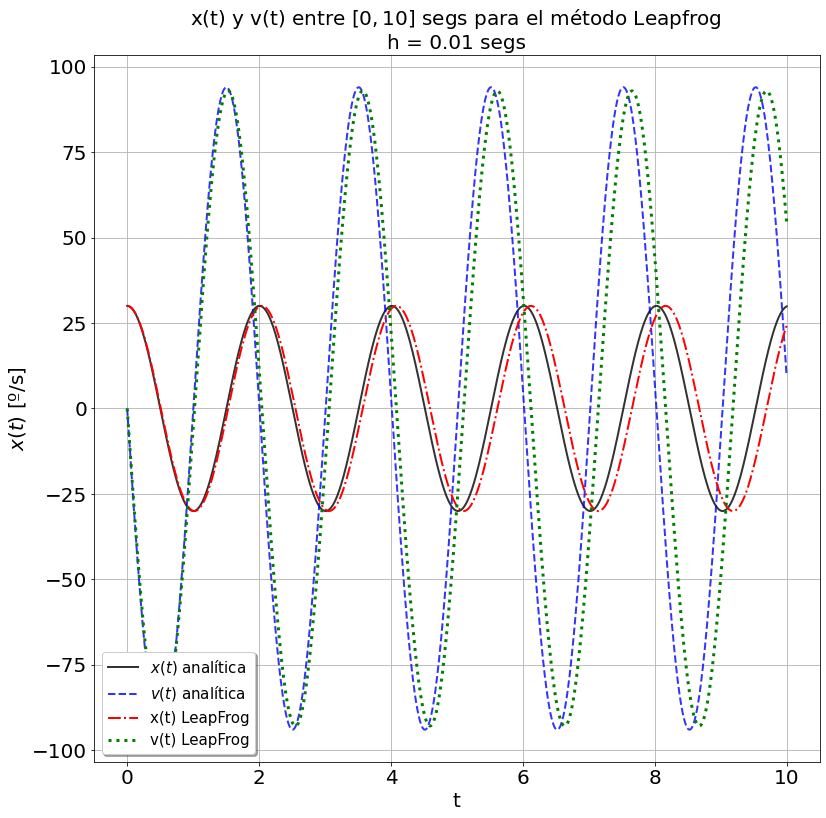

In [36]:
#Graficamos

s = np.linspace(0,10,n)
w = theta0*np.cos(np.sqrt(g/l)*s) #x(t) analítica
r = -(np.sqrt(g/l))*theta0*np.sin(np.sqrt(g/l)*s) #v(t) analítica (comen radianes)

w = RadToDeg(w)
r = RadToDeg(r) #Para escribirlos en grados

plt.figure(figsize=(13,13))
plt.plot(s,w,color='k',lw=2,alpha=0.8,label='$x(t)$ analítica')
plt.plot(s,r,color='b',lw=2,ls='--',alpha=0.8,label="$v(t)$ analítica")
plt.plot(t,x,color='r',lw=2,ls='-.',label='x(t) LeapFrog')
plt.plot(t,v,color='g',lw=3,ls=':',label='v(t) LeapFrog')
plt.grid(True)
plt.xlabel('t',size=20)
plt.ylabel('$x(t)$ [º/s]',size=20)
plt.title('x(t) y v(t) entre $[0,10]$ segs para el método Leapfrog \nh = 0.01 segs',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=15,shadow=True,loc='lower left');

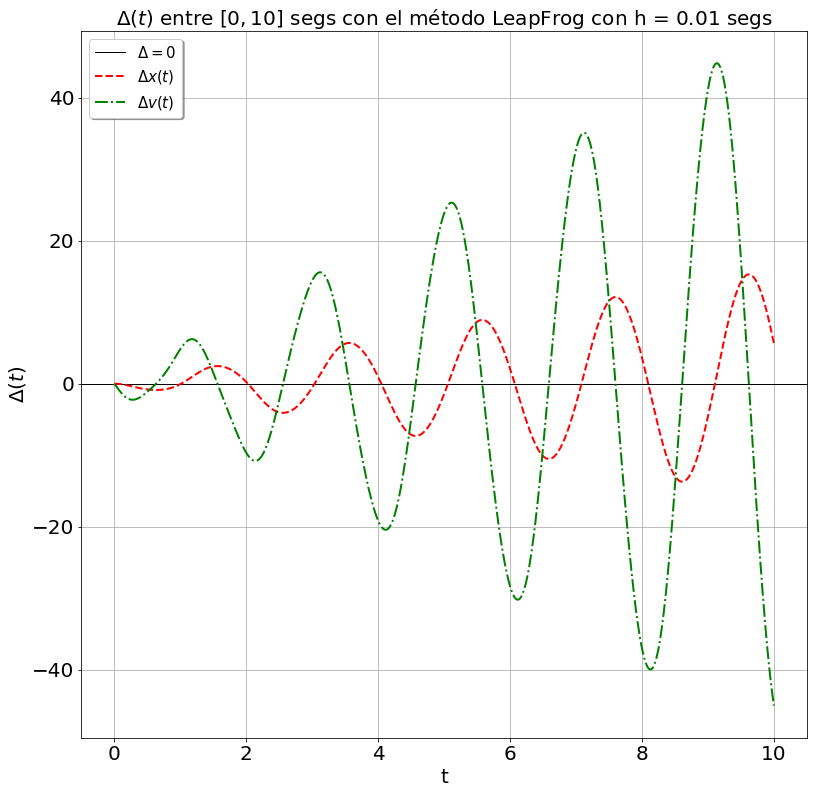

In [37]:
#Veamos el error, definido como E(x) = y(x) - y_num(x):

plt.figure(figsize=(13,13))
plt.axhline(0,lw=1,color='k',label='$\Delta = 0$')
plt.plot(s,w-x,color='r',lw=2,ls='--',label='$\Delta x(t)$')
plt.plot(s,r-v,color='g',lw=2,ls='-.',label='$\Delta v(t)$')
plt.grid(True)
plt.xlabel('t',size=20)
plt.ylabel('$\Delta (t)$',size=20)
plt.title('$\Delta (t)$ entre $[0,10]$ segs con el método LeapFrog con h = 0.01 segs',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.legend(fontsize=15,shadow=True);